# 1.Load dataset

In [2]:
import pandas as pd
df = pd.read_csv('Sentiment Analysis Dataset.csv')
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


# 2.Preprocess sentiment text

In [3]:
import re
import spacy
from spacy.lang.en import English

#### Removing punctuation
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z\s]' 
    return re.sub(pat, '', text)


#### Lemmatization
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# function to remove special characters
def get_lem(text):
    text = nlp(text)
    text = [word.lemma_.lower() if word.lemma_ != '-PRON-' else word.text for word in text]
    text_without_space = [word for word in text if not word.isspace()]

    return text_without_space

In [5]:
# build a pipeline to process sentence in dataset
def cleanup(text):
    text = remove_special_characters(text)
    tokens = get_lem(text)


    return tokens

In [6]:
# collect tokens with occurrences into a dict
tokens_dict = {}
for text in df['SentimentText'].values:
    tokens = cleanup(text)

    for token in tokens:
        if token in tokens_dict.keys():
            tokens_dict[token] += 1
        else: tokens_dict[token] = 1

In [10]:
fre_df = pd.DataFrame(tokens_dict.items(), columns=['Word','Occurency'])
fre_df = fre_df.sort_values(by='Occurency', ascending=False, ignore_index=True)
fre_df['Frequency'] = fre_df['Occurency'] / fre_df['Occurency'].sum()

# format decimal into percentage
fre_df['Frequency'] = pd.Series(["{0:.2f}%".format(val * 100) for val in fre_df['Frequency']], index = fre_df.index)

In [11]:
fre_df

,Word,Occurency,Frequency
0,i,821812,3.89%
1,to,592435,2.80%
2,the,518059,2.45%
3,a,375597,1.78%
4,not,338031,1.60%
...,...,...,...
794120,peelo,1,0.00%
794121,peeln,1,0.00%
794122,peelingpaper,1,0.00%
794123,peekinpete,1,0.00%


# 3. Plotting the law

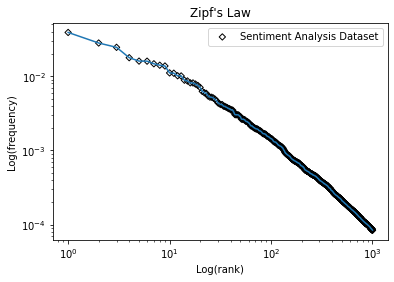

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# calculate frequencies for the first 1000 frequent words
fre = fre_df['Occurency'] / fre_df['Occurency'].sum()
fre = [f for f in fre.values[:1000]]

plt.scatter(range(1,1001),fre,marker = 'D',s=20, facecolors='none', edgecolors='k', label='Sentiment Analysis Dataset')
plt.plot(range(1,1001),fre)
#plt.plot(fre, '-o')
plt.title("Zipf's Law")
plt.ylabel('Log(frequency)')
plt.xlabel('Log(rank)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()